# Import Libraries

In [3]:
from utils.preprocessing import load_preprocessed_data, load_preprocessor
from models.mlp import MLP, Trainer, ASLDataset, plot_history
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Get Data and Preprocesssor

In [4]:
train_data = load_preprocessed_data('train')
val_data = load_preprocessed_data('val')
test_data = load_preprocessed_data('test')
preprocessor = load_preprocessor()

# Train Models

## MLP

### Initialize Network

In [6]:
input_dim = train_data[0].shape[-1]
output_dim = len(np.unique(train_data[-1]))
model = MLP(input_dim=input_dim, output_dim=output_dim)
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=12288, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=29, bias=True)
  )
)


### Initialize Trainer

In [7]:
trainer = Trainer(
    model=model,
    optimizer=optim.Adam,
    learning_rate=5e-4,
    loss_fn=nn.CrossEntropyLoss(),
    dataset_cls=ASLDataset,
    train_data=train_data,
    val_data=val_data,
    test_data=test_data,
    batch_size=32,
    num_epochs=100,
    patience=3
)

### Train Model

In [8]:
history = trainer.train()

Epoch 1/100:


Val Loss: 1.2632, Val Acc: 0.5527: 100%|██████████| 435/435 [00:01<00:00, 228.13it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 2/100:


Val Loss: 0.9564, Val Acc: 0.6407: 100%|██████████| 435/435 [00:02<00:00, 213.57it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 3/100:


Val Loss: 0.7461, Val Acc: 0.7226: 100%|██████████| 435/435 [00:02<00:00, 212.53it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 4/100:


Val Loss: 0.5281, Val Acc: 0.7947: 100%|██████████| 435/435 [00:01<00:00, 226.48it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 5/100:


Val Loss: 0.4717, Val Acc: 0.8225: 100%|██████████| 435/435 [00:01<00:00, 221.62it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 6/100:


Val Loss: 0.5375, Val Acc: 0.7970: 100%|██████████| 435/435 [00:01<00:00, 231.61it/s]



Epoch 7/100:


Val Loss: 0.3420, Val Acc: 0.8704: 100%|██████████| 435/435 [00:01<00:00, 226.29it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 8/100:


Val Loss: 0.4920, Val Acc: 0.8175: 100%|██████████| 435/435 [00:02<00:00, 194.85it/s]



Epoch 9/100:


Val Loss: 0.6409, Val Acc: 0.7928: 100%|██████████| 435/435 [00:01<00:00, 232.57it/s]



Epoch 10/100:


Val Loss: 0.2637, Val Acc: 0.9022: 100%|██████████| 435/435 [00:02<00:00, 211.02it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 11/100:


Val Loss: 0.2156, Val Acc: 0.9226: 100%|██████████| 435/435 [00:02<00:00, 211.92it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 12/100:


Val Loss: 0.3271, Val Acc: 0.8770: 100%|██████████| 435/435 [00:01<00:00, 219.18it/s]



Epoch 13/100:


Val Loss: 0.1810, Val Acc: 0.9302: 100%|██████████| 435/435 [00:01<00:00, 222.72it/s]


Saved best model weights to weights/best_model_checkpoint.pth

Epoch 14/100:


Val Loss: 0.2279, Val Acc: 0.9180: 100%|██████████| 435/435 [00:02<00:00, 202.60it/s]



Epoch 15/100:


Val Loss: 0.1845, Val Acc: 0.9314: 100%|██████████| 435/435 [00:01<00:00, 222.72it/s]



Epoch 16/100:


Val Loss: 0.1956, Val Acc: 0.9325: 100%|██████████| 435/435 [00:01<00:00, 227.24it/s]


Early stopping triggered at epoch 16.
Restoring weights back to epoch 13.


### Visualize Training

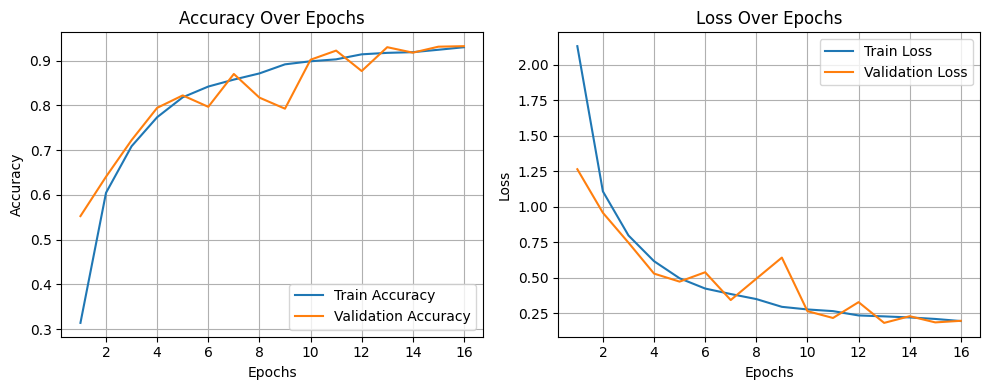

In [9]:
plot_history(history=history)

### Evalaute Model on Test Set

In [10]:
_ = trainer.evaluate(loader_type='test')

Test Loss: 0.1867, Test Acc: 0.9260: 100%|██████████| 544/544 [00:03<00:00, 176.00it/s]
